# 2022 Finance Anlaysis.


### Pre-Processing done in script 2
### data: ' data-edited.csv'


#### base this analysis in Script 1
#### furhter analysis to be made

In [2]:
import pandas as pd

df = pd.read_csv('data-edited.csv')
df = df[df['Year']==2022]

In [2]:
df.columns

Index(['Year', 'Month', 'Date', 'Description', 'Sub-Category', 'Category',
       'Category Type', 'Income', 'Debits', 'Balance', 'amount'],
      dtype='object')

In [3]:
df['Sub-Category'].unique()

array([nan, 'Transportation', 'Utilities', 'Income', 'Fast-Food',
       'Groceries', 'Services', 'Eat-outs', 'Washer/Dryer', 'Clothes',
       'Insurance', 'Entertainment', 'income', 'Rent', 'Gifts',
       'fast-Food', 'Trips', 'Tech', 'rent', 'tech',
       'Investments/savings', 'groceries'], dtype=object)

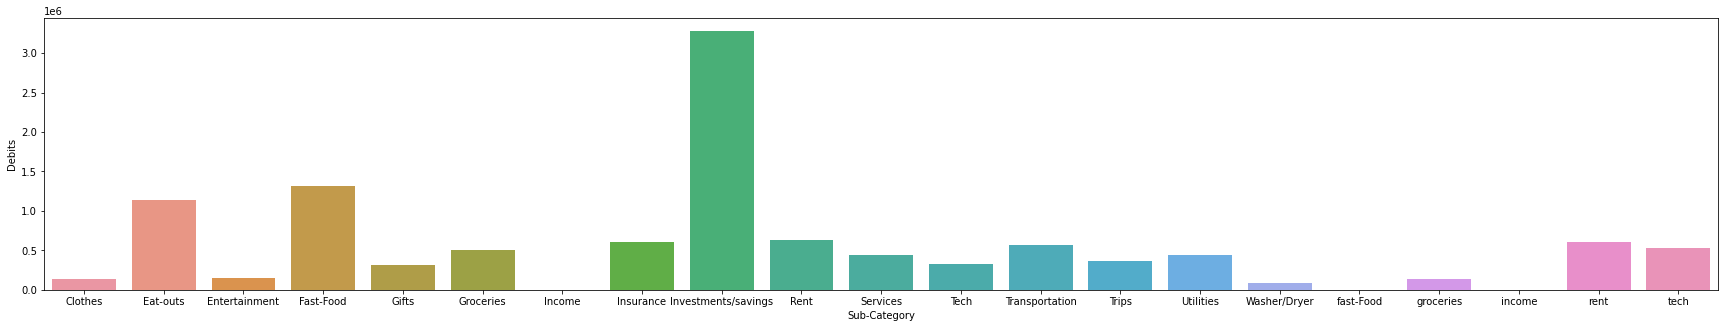

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_1 = df[df['Year']==2022].groupby(['Sub-Category']).sum()

fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(data=plot_1, x=plot_1.index, y="Debits")
plt.show()

In [5]:
plot_1.index

Index(['Clothes', 'Eat-outs', 'Entertainment', 'Fast-Food', 'Gifts',
       'Groceries', 'Income', 'Insurance', 'Investments/savings', 'Rent',
       'Services', 'Tech', 'Transportation', 'Trips', 'Utilities',
       'Washer/Dryer', 'fast-Food', 'groceries', 'income', 'rent', 'tech'],
      dtype='object', name='Sub-Category')

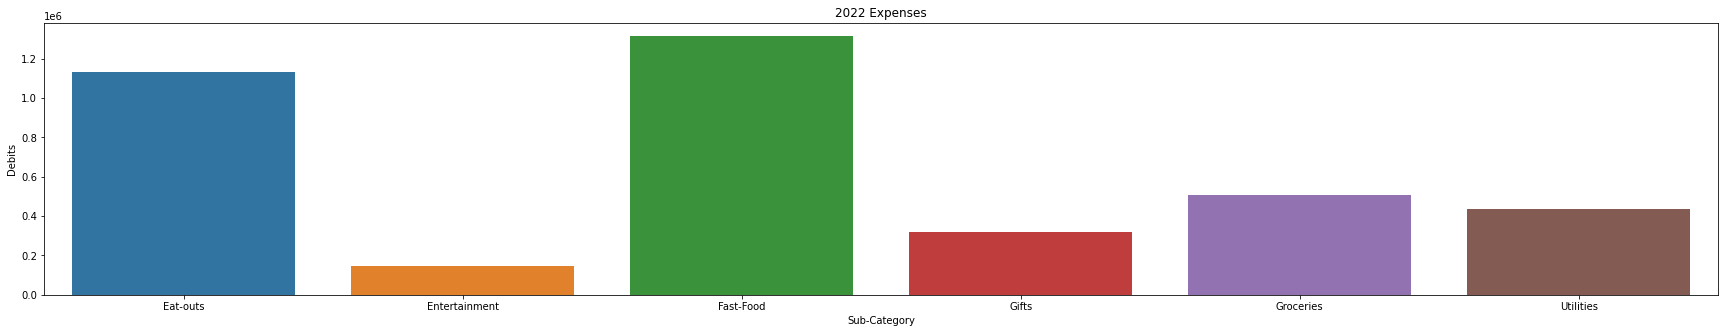

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_2 = plot_1.loc[['Eat-outs','Entertainment','Fast-Food','Gifts','Groceries','Utilities']]

fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(data=plot_2, x=plot_2.index, y="Debits")
plt.title('2022 Expenses')
plt.show()

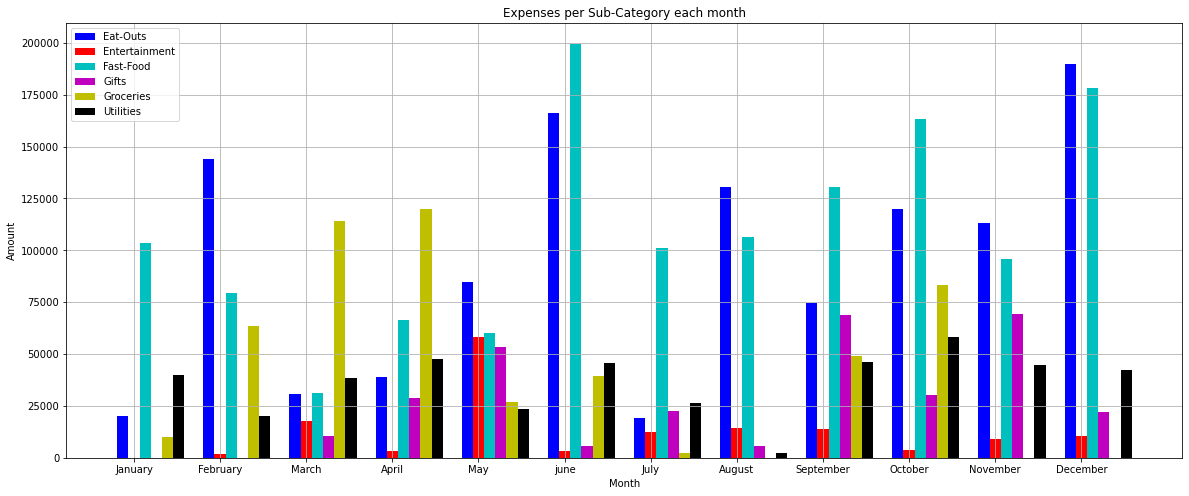

In [7]:
import numpy as np
import matplotlib.pyplot as plt
 
def get_values(df,category):
    a=1
    values=[]
    for i in range(12):
        data=df[df['Month']==a]
        values.append(data[data['Sub-Category']==str(category)]['Debits'].sum())
        a=a+1
    return values    
    
N = 12
ind = np.arange(N) 
width = 0.13
plt.figure(figsize=(20,8))


#[['Eat-outs','Entertainment','Fast-Food','Gifts','Groceries','Utilities']]

eatouts=get_values(df,str('Eat-outs'))
bar1 = plt.bar(ind, eatouts, width, color = 'b')

entertainment=get_values(df,str('Entertainment'))
bar2 = plt.bar(ind+width, entertainment, width, color = 'r')

fastfood=get_values(df,str('Fast-Food'))
bar3 = plt.bar(ind+width*2, fastfood, width, color = 'c')

gifts=get_values(df,str('Gifts'))
bar4 = plt.bar(ind+width*3, gifts, width, color = 'm')

groceries=get_values(df,str('Groceries'))
bar5 = plt.bar(ind+width*4, groceries, width, color = 'y')

utilities=get_values(df,str('Utilities'))
bar6 = plt.bar(ind+width*5, utilities, width, color = 'k')

#expenses=get_values(df,str('Utilities'))
#bar6 = plt.bar(ind+width*5, utilities, width, color = 'k')

  
plt.xlabel("Month")
plt.ylabel('Amount')
plt.title("Expenses per Sub-Category each month")
  
plt.xticks(ind+width,['January','February','March','April','May','june','July','August','September','October','November','December'])
plt.legend( (bar1, bar2,bar3,bar4,bar5,bar6), ('Eat-Outs','Entertainment','Fast-Food','Gifts','Groceries','Utilities') )
plt.grid()
plt.show()

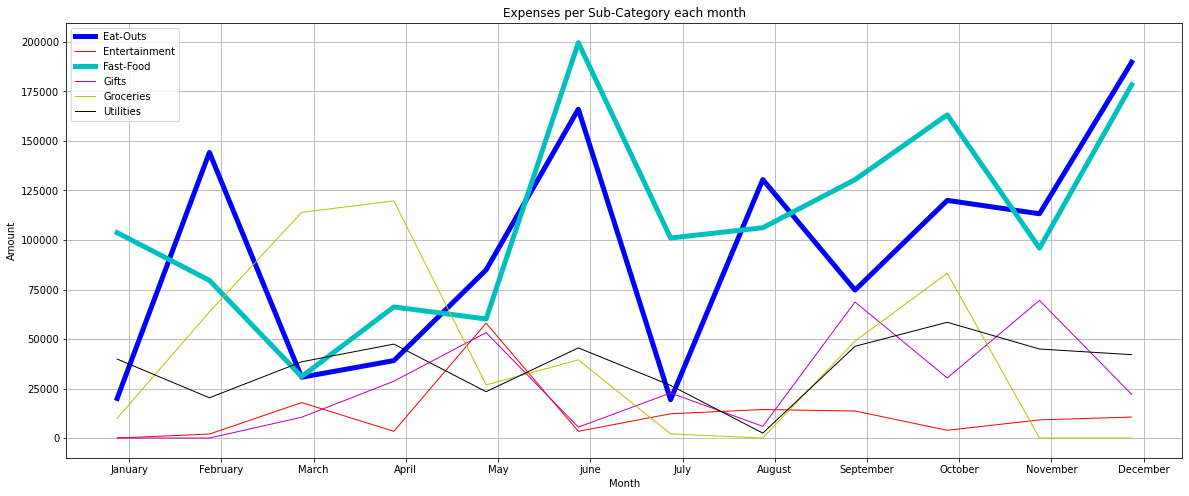

In [8]:
import numpy as np
import matplotlib.pyplot as plt
 
def get_values(df,category):
    a=1
    values=[]
    for i in range(12):
        data=df[df['Month']==a]
        values.append(data[data['Sub-Category']==str(category)]['Debits'].sum())
        a=a+1
    return values    
    
N = 12
ind = np.arange(N) 
width = 0.13
plt.figure(figsize=(20,8))


#[['Eat-outs','Entertainment','Fast-Food','Gifts','Groceries','Utilities']]

eatouts=get_values(df,str('Eat-outs'))
plot1 = plt.plot(ind, eatouts,linewidth=5, color = 'b',label='Eat-Outs')

entertainment=get_values(df,str('Entertainment'))
plot2 = plt.plot(ind, entertainment,linewidth=1, color = 'r',label='Entertainment')

fastfood=get_values(df,str('Fast-Food'))
plot3 = plt.plot(ind, fastfood,linewidth=5, color = 'c',label='Fast-Food')

gifts=get_values(df,str('Gifts'))
plot4 = plt.plot(ind, gifts,linewidth=1, color = 'm',label='Gifts')

groceries=get_values(df,str('Groceries'))
plot5 = plt.plot(ind, groceries,linewidth=1, color = 'y',label='Groceries')

utilities=get_values(df,str('Utilities'))
plot6 = plt.plot(ind, utilities,linewidth=1,color = 'k',label='Utilities')

  
plt.xlabel("Month")
plt.ylabel('Amount')
plt.title("Expenses per Sub-Category each month")
  
plt.xticks(ind+width,['January','February','March','April','May','june','July','August','September','October','November','December'])
#plt.legend( [plot1, plot2,plot3,plot4,plot5,plot6], ['Eat-outs','Entertainment','Fast-Food','Gifts','Groceries','Utilities'] )
plt.legend()
plt.grid()
plt.show()

### - Co-relation between 'Fast-Food' and 'Eat-outs' : 0.6519
### - 'Utilities' seem stable
### - 'Entertainment' no tendency
### - 'Groceries' go up when the semester starts, then decline eventually.
### - 'Gifts' has a slight tendency to be higher during the semester

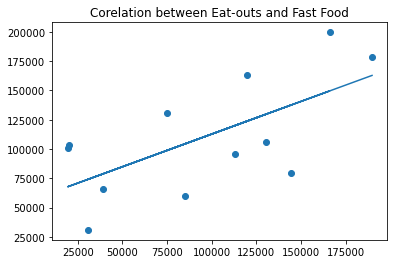

Pearson Corelation: 0.6490415886647148


In [9]:
import matplotlib.pyplot as plt
from scipy import stats


slope, intercept, r, p, std_err = stats.linregress(eatouts, fastfood)

def myfunc(x):
  return slope * x + intercept

#Linear regression model.
mymodel = list(map(myfunc, eatouts))

plt.scatter(eatouts, fastfood)
plt.plot(eatouts, mymodel)
plt.title('Corelation between Eat-outs and Fast Food')
plt.show()

pearson_corr= np.corrcoef(eatouts, fastfood)
print('Pearson Corelation:',pearson_corr[0][1])

mean:  36328.805555555555 max value:  58450.0 min value:  2500.0


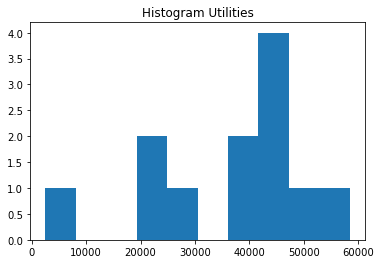

In [10]:
mean = np.mean(utilities)
max_value= np.max(utilities)
min_value = np.min(utilities)

print('mean: ',mean,'max value: ',max_value,'min value: ',min_value)
plt.hist(utilities)
plt.title('Histogram Utilities')
plt.show() 

In [11]:
print(df[df['Sub-Category']=='Fast-Food']['Description'].unique())

['도시락, 라면, 주스' '체육덮밥 배달' '과자, 빵, 누텔라' 'GS도시락 등등' 'Cu -Burger'
 'Cu- 과자, 빵, 햄버거' 'Cu- Burger' 'GS25 - Chicken, Burguer' 'Emart 24 '
 'Hamburger' '카페' '7eleven - Fast Food' 'Jugo de Mango' 'Fast food - 음료수'
 'Gatorade at work' '영립자판기' 'Café en cajas' 'Almuerzo en cajas'
 'Cena cu dosirak ramen' 'Galletas en Tren' '7 eleven - fast food'
 'Cu - café con kwon' 'Cu - fast food' 'Sandwich subway' 'Jugo de naranja'
 'kkimbap' 'Pan dulce mas pan almuerzo' 'Fast food - Cafesin' '7eleven'
 'Hamburge' 'Hamburguer' 'hamburguer' '과자' 'Milk drink'
 'Pan+Chocolateleche' '도시락' 'Milk drink con tohsi' 'Gaseosa' 'Mcol'
 'Hamburguesa' 'helado con 정화 ' 'Chocolate Konaking' 'Café en CU'
 'Croissant' 'Cafesito pa estudiar' 'CU pan con queso*2' 'corissant'
 'Helado con toshi' 'Nutella' 'snack con leche negra' '과자 + 두유'
 'Hamburguesa CU' "Mom's touch con kenshin" '체육덥밥' 'Fast food'
 'Red bull y pollo pal pana' 'Sanwich con 두유' 'Meckol 김밥' '두유+Cake' 'fast'
 '두유+케이크' '김밥+두유' '두유' 'Pepsi+pokari horacio' 'Coca' 'Cu

In [12]:
len(df[df['Sub-Category']=='Fast-Food']['Debits'])

378

In [13]:
# Get total expenses per month of Fast-Food, Eat-outs, Groceries
debits = df.loc[df['Sub-Category'].isin(['Fast-Food','Eat-outs','Groceries'])].groupby('Month').sum()['Debits']

#  2022 Comparison Total Food Expenses  'Fast-Food, Eat-outs, Groceries' Tendency

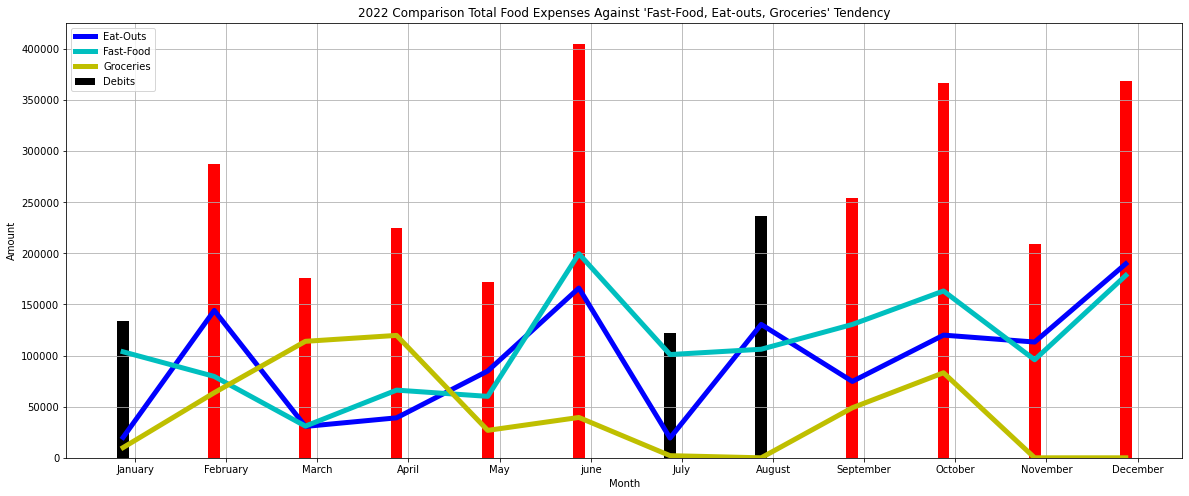

In [14]:
import numpy as np
import matplotlib.pyplot as plt
 
def get_values(df,category):
    a=1
    values=[]
    for i in range(12):
        data=df[df['Month']==a]
        values.append(data[data['Sub-Category']==str(category)]['Debits'].sum())
        a=a+1
    return values    
    
N = 12
ind = np.arange(N) 
width = 0.13
plt.figure(figsize=(20,8))


#[['Eat-outs','Entertainment','Fast-Food','Gifts','Groceries','Utilities']]

debits = df.loc[df['Sub-Category'].isin(['Fast-Food','Eat-outs','Groceries'])].groupby('Month').sum()['Debits']
bar1 = plt.bar(ind, debits, width, color=['k', 'r', 'r', 'r', 'r', 'r', 'k', 'k', 'r', 'r', 'r', 'r'],label='Debits')

eatouts=get_values(df,str('Eat-outs'))
plot1 = plt.plot(ind, eatouts,linewidth=5, color = 'b',label='Eat-Outs')

#entertainment=get_values(df,str('Entertainment'))
#plot2 = plt.plot(ind, entertainment,linewidth=1, color = 'r',label='Entertainment')

fastfood=get_values(df,str('Fast-Food'))
plot3 = plt.plot(ind, fastfood,linewidth=5, color = 'c',label='Fast-Food')

#gifts=get_values(df,str('Gifts'))
#plot4 = plt.plot(ind, gifts,linewidth=1, color = 'm',label='Gifts')

groceries=get_values(df,str('Groceries'))
plot5 = plt.plot(ind, groceries,linewidth=5, color = 'y',label='Groceries')

#utilities=get_values(df,str('Utilities'))
#plot6 = plt.plot(ind, utilities,linewidth=1,color = 'k',label='Utilities')

  
plt.xlabel("Month")
plt.ylabel('Amount')
plt.title("2022 Comparison Total Food Expenses Against 'Fast-Food, Eat-outs, Groceries' Tendency")
  
plt.xticks(ind+width,['January','February','March','April','May','june','July','August','September','October','November','December'])
plt.legend()
plt.grid()
plt.show()

# - July and August I was working in beache palace

### - 2 months with most expenses: 'December , June' 
#### June and December are both the last month of each semester, therefore that is a time when I am stressed and begin to buy more junk food, and eat out with my friends to relieve stress. 

# 2022 Income vs Expenses

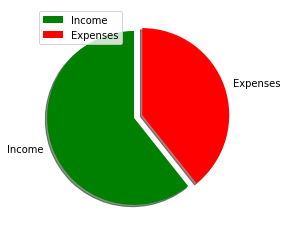

 Annual Income: 12,763,346
 Annual expenses:  8,270,444
 Difference:  4,492,902

 Total savings 3,280,329


In [18]:
import matplotlib.pyplot as plt
import numpy as np

data = df[df['Year']==2022]

savings = data[data['Sub-Category']=='Investments/savings']['Debits'].sum()
data=data[data['Sub-Category']!='Investments/savings']


income = data['Income'].sum()
expenses = data['Debits'].sum()


y = income,expenses

mylabels = ["Income", "Expenses"]

myexplode = [0.1, 0]

mycolors = ["green", "r"]

plt.pie(y, labels = mylabels, explode = myexplode,startangle = 90,shadow = True,colors = mycolors)
plt.legend()
plt.show() 

difference = income-expenses
print(" Annual Income:",f'{income:,.0f}\n', "Annual expenses: ",f'{expenses:,.0f}\n',"Difference: ",f'{difference:,.0f}')

print("\n Total savings",f'{savings:,.0f}')

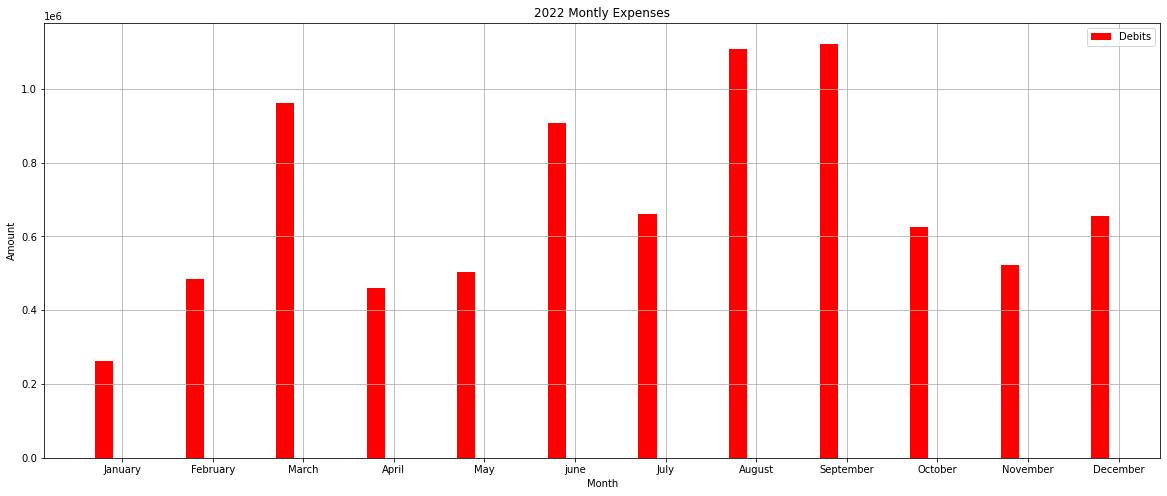

In [58]:
import numpy as np
import matplotlib.pyplot as plt

N = 12
ind = np.arange(N) 
width = 0.20
plt.figure(figsize=(20,8))

data=df[df['Sub-Category']!='Investments/savings']

debits = data.groupby('Month').sum()['Debits']
bar1 = plt.bar(ind, debits, width,color='r',label='Debits')

plt.xlabel("Month")
plt.ylabel('Amount')
plt.title("2022 Montly Expenses")
  
plt.xticks(ind+width,['January','February','March','April','May','june','July','August','September','October','November','December'])
plt.legend()
plt.show()

In [59]:
debits_df = pd.DataFrame(debits)
debits_df.index = ['January','February','March','April','May','june','July','August','September','October','November','December'] 

lower = debits_df['Debits'].min()
higher = debits_df['Debits'].max()

print(' Lowest month',debits_df[debits_df['Debits']==lower].index.values,f'{lower:,.0f}')
print('\n Highest month',debits_df[debits_df['Debits']==higher].index.values,f'{higher:,.0f}')

 Lowest month ['January'] 262,260

 Highest month ['September'] 1,122,507


In [64]:
mean = debits_df['Debits'].mean()
std = debits_df['Debits'].std()

print('Mean:',f'{mean:,.2f} ','\n stv: ',f'{std:,.2f}')

Mean: 689,203.64  
 stv:  274,460.13
